# Meta Inc. Stock price predictions

Let's take a look to stock prices and market capitalisation as a result of how market reacts to financial statistics of the company. 
First of all we need to extract financial statistics from the web. After that we need to determine affection of this statistics to stock price and discover correlation.
Final step will be building model to predict market capitalisation for the next quorter.

Import libraries

In [1]:
import pandas as pd
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.7.6) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

pkgs/main/linux-64       [>                   ] (--:--) No change
pkgs/main/linux-6

In [2]:
#Import libraries for webscrapping
import requests
from bs4 import BeautifulSoup

Set url and get request

In [3]:
url = "https://www.macrotrends.net/stocks/charts/META/meta-platforms/revenue"

html_data = requests.get(url).text   #get data from the webpage
souped_html = BeautifulSoup(html_data, 'html5lib') #Use beautifulsoup
souped_html.title

<title>Meta Platforms Revenue 2010-2022 | META | MacroTrends</title>

In [4]:
# Find the second table with Quarterly Revenue /or use 0 for first table
revenue_table = souped_html.find_all('table')[1]   

#Create blank dataframe 
revenue_dataframe = pd.DataFrame(columns=["Date", "Revenue"]) 
 
# Find all tr tags and put data into Dataframe
count_of_missed_rows = 0
for row in revenue_table.find("tbody").find_all("tr"):  

    col = row.find_all("td") 
    date = col[0].text 
    Revenue = col[1].text
    Revenue = Revenue.replace('$', '').replace(',', '')

    if Revenue.isdigit():
        Revenue = float(Revenue)
        revenue_dataframe = revenue_dataframe.append({"Date":date, "Revenue":Revenue}, ignore_index=True)
    else: 
        count_of_missed_rows = count_of_missed_rows + 1
        
print("Missed rows:", count_of_missed_rows) #How many rows were missed

Missed rows: 1


In [5]:
revenue_dataframe.head()

,Date,Revenue
0,2022-06-30,28822.0
1,2022-03-31,27908.0
2,2021-12-31,33671.0
3,2021-09-30,29010.0
4,2021-06-30,29077.0


Now when revenue data extracted we need stocks price data.

## Extracting stock prices

I'm going to use Yahoo finance API to extract stock prices history.

In [6]:
# Import library
import yfinance as yf

In [7]:
# Set ticker
meta = yf.Ticker("META")

In [8]:
# Get history data
hist = meta.history(period="max")

In [9]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,0,0
2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,0,0
2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,0,0
2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,0,0
2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,0,0


Let's visualise data

<AxesSubplot:xlabel='Date'>

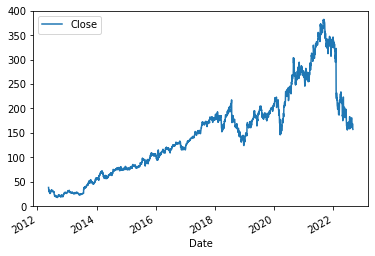

In [10]:
# Reset index
hist.reset_index(inplace=True)
# Plot the chart
hist.plot(x="Date", y="Close")

In [30]:
def my_func(price_df, revenue_df):
    
    for index, row in revenue_df.iterrows():
        revenue_date = revenue_df.iloc[index, 0]
        
        for price_index, price_row in price_df.iterrows():
            price_date = price_df.iloc[price_index, 0]
            if price_date == date:
                print(date)
            else:
                break
    

In [31]:
my_func(hist, revenue_dataframe)

In [34]:
hist.iloc[0, 0]

Timestamp('2012-05-18 00:00:00')